# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Insights
1. Unsurprisingly, the equator shows the highest average temperatures, curving downwards the further north or south you get from the 0th parallel.
2. Latitude doesn't seem to have any impact on cloud density. Additionally, cloudiness seems to show very linear patterns on the scatterplot, with many exact temperatures recurring frequently. I'm inclined to chalk this up to a matter of how cloudiness is recorded, but it may be that cloud density shows much more consistent patterns accross the planet vs temperature/humity/etc.
3. Wind-speeds rarely seem to rise above 15 mph, but when they do, they seem to do so further away from the equator. This is consistent with the wind-pattern known as "The Doldrums."

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#base url + apikey snippet
main_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

#create list to hold city data
cities_dict_list = []

# Start counter
counter = 1
    
# Loop through all the cities in our list
for i, city in enumerate(cities):

    #base url + apikey snippet + iterating city url
    city_url = main_url + "&q=" + city
    
    # display the record# and corresponding city
    print(f"Processing Record {counter} : {city}")

    #tick record counter
    counter = counter + 1
    
    #Start API call
    try:
        #call the API at the current city's endpoint
        api_call = requests.get(city_url)
        #jsonify the retrieved data
        readings = api_call.json()

        #create variables to hold temperature, cloudiness, humidity, windspeed
        lat = readings["coord"]["lat"]
        lng = readings["coord"]["lon"]
        max_temp = readings["main"]["temp_max"]
        humidity = readings["main"]["humidity"]
        clouds = readings["clouds"]["all"]
        wind = readings["wind"]["speed"]
        country = readings["sys"]["country"]
        date = readings["dt"]

        # Append the City information into data list
        cities_dict_list.append({"City": city, 
                          "Lat": lat, 
                          "Lng": lng, 
                          "Max Temp": max_temp,
                          "Humidity": humidity,
                          "Cloudiness": clouds,
                          "Wind Speed": wind,
                          "Country": country,
                          "Date": date})
    #Error prevention; abort city if it fails to return data
    except:
        print("Invalid request. Skipping city")
        pass
print("Operation Complete")

Processing Record 1 | chuy
Processing Record 2 | airai
Processing Record 3 | punta arenas
Processing Record 4 | tumannyy
Invalid request. Skipping city
Processing Record 5 | kawalu
Processing Record 6 | kavieng
Processing Record 7 | coquimbo
Processing Record 8 | pulheim
Processing Record 9 | samalaeulu
Invalid request. Skipping city
Processing Record 10 | codrington
Processing Record 11 | cherskiy
Processing Record 12 | vaini
Processing Record 13 | puerto ayora
Processing Record 14 | kapaa
Processing Record 15 | rundu
Processing Record 16 | arraial do cabo
Processing Record 17 | batemans bay
Processing Record 18 | new norfolk
Processing Record 19 | lata
Processing Record 20 | avarua
Processing Record 21 | pandhurna
Processing Record 22 | angoche
Processing Record 23 | sedona
Processing Record 24 | dingle
Processing Record 25 | jamestown
Processing Record 26 | saint george
Processing Record 27 | gushikawa
Processing Record 28 | port blair
Processing Record 29 | mataura
Processing Recor

Processing Record 234 | griffith
Processing Record 235 | kem
Processing Record 236 | kamenka
Processing Record 237 | den helder
Processing Record 238 | khatanga
Processing Record 239 | celestun
Processing Record 240 | barentsburg
Invalid request. Skipping city
Processing Record 241 | lujan
Processing Record 242 | cowra
Processing Record 243 | moussoro
Processing Record 244 | clyde
Processing Record 245 | itarema
Processing Record 246 | gladstone
Processing Record 247 | evansville
Processing Record 248 | marzuq
Processing Record 249 | clyde river
Processing Record 250 | bata
Processing Record 251 | sol-iletsk
Processing Record 252 | quatre cocos
Processing Record 253 | port pirie
Processing Record 254 | narsaq
Processing Record 255 | karamea
Invalid request. Skipping city
Processing Record 256 | juneau
Processing Record 257 | bourail
Processing Record 258 | escarcega
Processing Record 259 | tsihombe
Invalid request. Skipping city
Processing Record 260 | sorong
Processing Record 261 | vi

Processing Record 464 | adrar
Processing Record 465 | yeppoon
Processing Record 466 | esperance
Processing Record 467 | tuggurt
Invalid request. Skipping city
Processing Record 468 | naze
Processing Record 469 | azimur
Invalid request. Skipping city
Processing Record 470 | khani
Processing Record 471 | maraba
Processing Record 472 | muros
Processing Record 473 | guadalupe y calvo
Processing Record 474 | madras
Processing Record 475 | lashio
Processing Record 476 | hermosillo
Processing Record 477 | chama
Processing Record 478 | srandakan
Processing Record 479 | bose
Processing Record 480 | rupnagar
Processing Record 481 | datong
Processing Record 482 | acapulco
Processing Record 483 | mathbaria
Processing Record 484 | presidencia roque saenz pena
Processing Record 485 | novytsya
Processing Record 486 | seydi
Processing Record 487 | teahupoo
Processing Record 488 | eldorado
Processing Record 489 | bolshaya sosnova
Processing Record 490 | uruzgan
Processing Record 491 | ola
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#create dataframe
cities_df = pd.DataFrame(cities_dict_list)

#isolate relevant columns for matplotlib analysis
#x values
lats = cities_df["Lat"]

#y values
max_temps = cities_df["Max Temp"]
humidity = cities_df["Humidity"]
cloudiness = cities_df["Cloudiness"]
wind_speed = cities_df["Wind Speed"]

#generate csv
cities_df.to_csv("cities.csv", index_label="City_ID")

#verify all rows/columns are equally populated
cities_df.count()

City          588
Cloudiness    588
Country       588
Date          588
Humidity      588
Lat           588
Lng           588
Max Temp      588
Wind Speed    588
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [16]:
#create lists of variables for insertion into plots
y_values = max_temps, humidity, cloudiness, wind_speed
titles = "Max Temperature (%s)", "Humidity (%s)", "Cloudiness (%s)","Wind Speed (%s)"
y_labels = "Max Temperature (F)", "Humidity (%)", "Cloudiness (%)","Wind Speed (mph)"

In [17]:
# create dynamic plot function
def plotter(i):
    plt.scatter(lats, 
                y_values[i],
                linewidths=1, marker="o", 
                alpha=0.8, label="Cities")
    
    # Incorporate the other graph properties
    plt.title(f"City Latitude vs. {titles[i]}" % time.strftime("%x"))
    plt.ylabel(y_labels[i])
    plt.xlabel("Latitude")
    plt.grid(True)
    
    # Save the figure
    plt.savefig(f"Fig{i}.png")
    plt.show()

#### Latitude vs. Temperature Plot

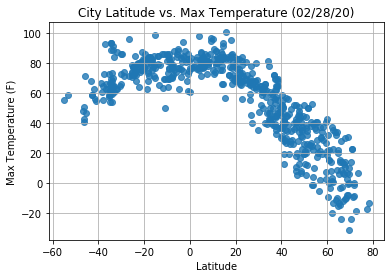

In [18]:
plotter(0)

#### Latitude vs. Humidity Plot

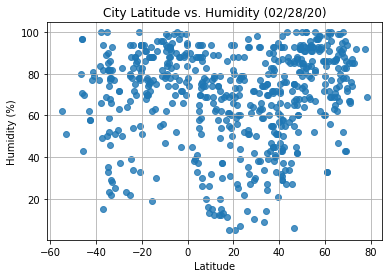

In [19]:
plotter(1)

#### Latitude vs. Cloudiness Plot

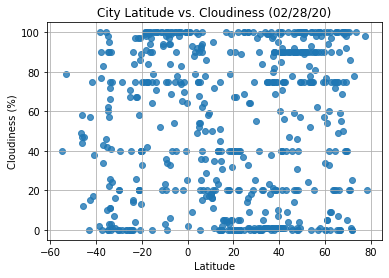

In [20]:
plotter(2)

#### Latitude vs. Wind Speed Plot

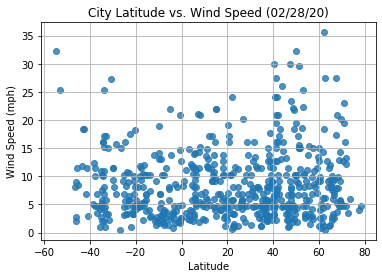

In [21]:
plotter(3)